# Surprisingly there are only three numbers that can be written as the sum of fourth powers of their digits:

# $ 1634 = 1^{4}+6^{4}+3^{4}+4^{4}$
# $8208 = 8^{4}+2^{4}+0^{4}+8^{4}$
# $9474 = 9^{4}+4^{4}+7^{4}+4^{4}$

# As $1 = 1^{4}$ is not a sum, it is not included

# The sum of these numbers is 1634 + 8208 + 9474 = 19316.

# Find the sum of all the numbers that can be written as the sum of fifth powers of their digits.

____


## For a number to be equal to the sum of the fifth power of each of its digits, the sum must have as many digits as the number itself (obviously)

## The maximum possible two digit number is 99, and $9^{5}+9^{5} = 118,098$ which is a 6 digit number

### To create a list of candidates to satisfy our condition, let's first compare numbers of increasing digits and the sum of the fifth power of their digits

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

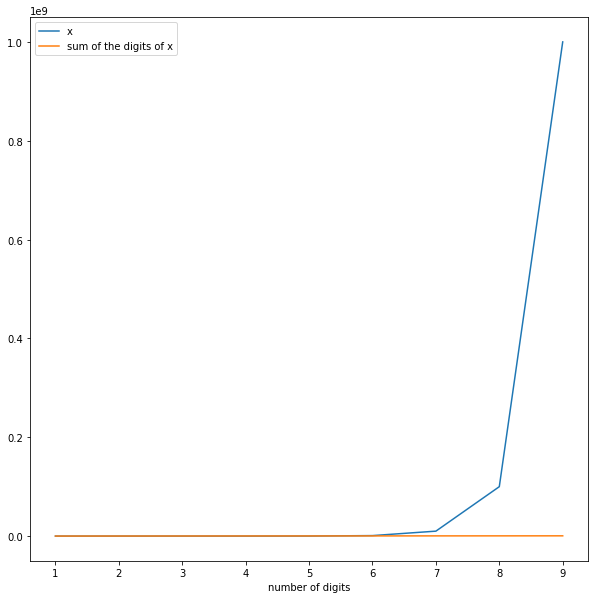

In [61]:
x = []
y = []

for n_digits in range(1,10):
    x.append(int('9'*n_digits))
    y.append(n_digits*(9**5))
    
plt.plot(range(1,10), x, label = 'x')
plt.plot(range(1,10), y, label = 'sum of the digits of x')
plt.xlabel('number of digits')
plt.legend()
plt.show()

# As we can see, after 6 digits, it's impossible for the sum of the fifth power of the digits of x to be equal to x

## This means that the greatest candidate has a value of 999,999

In [36]:
list_candidates = [str(x) for x in range(1,1000000)]

In [44]:
df = pd.DataFrame(list(x) for x in list_candidates).fillna(0).astype(int)**5
df.index = range(1,1000000)

In [45]:
df.tail()

,0,1,2,3,4,5
999995,59049,59049,59049,59049,59049,3125
999996,59049,59049,59049,59049,59049,7776
999997,59049,59049,59049,59049,59049,16807
999998,59049,59049,59049,59049,59049,32768
999999,59049,59049,59049,59049,59049,59049


### Now, we just need to find the rows where the sum of columns 0 through 5 is equal to the index

In [54]:
df_match = df[df.sum(axis = 1)==(df.index)]
df_match

,0,1,2,3,4,5
1,1,0,0,0,0,0
4150,1024,1,3125,0,0,0
4151,1024,1,3125,1,0,0
54748,3125,1024,16807,1024,32768,0
92727,59049,32,16807,32,16807,0
93084,59049,243,0,32768,1024,0
194979,1,59049,1024,59049,16807,59049


## Recall: since 1 is not a sum, we exclude it from our list

## Checking a few of them:

### 4150

In [47]:
4**5+1**5+5**5+0**5

4150

### 4151

In [48]:
4**5+1**5+5**5+1**5

4151

### 194979

In [50]:
1**5+9**5+4**5+9**5+7**5+9**5

194979

## All seem to match up

In [58]:
list_values = list(df_match.index)[1:]

In [59]:
list_values

[4150, 4151, 54748, 92727, 93084, 194979]

In [60]:
sum(list_values)

443839

# Answer: 443,839